In [47]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

In [48]:
fdf = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\data_member.csv", index_col=0) # for Windows
# fdf = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/data member.csv', index_col=0) # for MacOS

fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590565 entries, 0 to 590564
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ent              590565 non-null  object
 1   original_status  590565 non-null  object
 2   join_month       590565 non-null  int64 
 3   join_year        590565 non-null  int64 
 4   sponsor          590565 non-null  object
dtypes: int64(2), object(3)
memory usage: 27.0+ MB


In [49]:
## FOR Windows
t21_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2021.csv", index_col=0)
t22_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2022.csv", index_col=0)
t23_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2023.csv", index_col=0)

## FOR Mac
# t21_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2021.csv', index_col=0)
# t22_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2022.csv', index_col=0)
# t23_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2023.csv', index_col=0)

tall_df = pd.concat([t21_df,t22_df,t23_df])
tall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4129114 entries, 0 to 643128
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   payment_date       object 
 1   ent                object 
 2   center             object 
 3   total_amount       float64
 4   discount           float64
 5   paid_amount        int64  
 6   trans_origin_type  object 
 7   product            object 
 8   qty                int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 315.0+ MB


In [50]:
## for Windows

ff = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2021.csv', index_col=0)
ff1 = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2022.csv', index_col=0)
ff2 = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2023.csv', index_col=0)

## for MacOS

# ff = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/transaction 2021.csv', index_col=0)
# ff1 = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/transaction 2022.csv', index_col=0)
# ff2 = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/transaction 2023.csv', index_col=0)

o_df = pd.concat([ff,ff1,ff2])
o_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406316 entries, 0 to 362108
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   payment_date       object 
 1   ent                object 
 2   center             object 
 3   product_json       object 
 4   total_amount       float64
 5   discount           float64
 6   paid_amount        int64  
 7   trans_origin_type  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 165.2+ MB


# STEP 1
- Clean DATA

In [51]:
fdf['join'] = pd.to_datetime(fdf['join_year'].astype(str) + '/' + fdf['join_month'].astype(str) + '/01')
fdf = fdf.loc[:,['ent','original_status','sponsor','join']]
fdf['mem_duration(months)'] = round((dt.datetime(2023, 7, 1)-fdf['join'])/np.timedelta64(1, 'M'))

fdf

,ent,original_status,sponsor,join,mem_duration(months)
0,UCC4CC4F,-,8844CQCEY,2014-05-01,110.0
1,UCC4CCEK,-,8844CQCCU,2014-05-01,110.0
2,UCC4CC15,-,8844CQCEY,2014-05-01,110.0
3,UCC4CCR2,-,8844CQCEY,2014-05-01,110.0
4,UCC4CCJP,-,8844CQCEY,2014-05-01,110.0
...,...,...,...,...,...
590560,H3CCC43B,A,H3CCC4R2,2010-07-01,156.0
590561,H3CCC4ZY,A,H3CCC4JP,2010-06-01,157.0
590562,H3CCCEC7,A,H3CCC4JP,2010-07-01,156.0
590563,H3CCCE4I,A,H3CCC4JP,2010-07-01,156.0


In [52]:
# Change Date format
tall_df['payment_date'] = pd.to_datetime(tall_df['payment_date'], format='%Y-%m-%d %H:%M:%S')
tall_df['payment_date'] = pd.to_datetime( tall_df['payment_date'].dt.to_period('M').astype(str) )

o_df['payment_date'] = pd.to_datetime(o_df['payment_date'], format='%Y-%m-%d %H:%M:%S')
o_df['payment_date'] = pd.to_datetime( o_df['payment_date'].dt.to_period('M').astype(str) )

tall_df

,payment_date,ent,center,total_amount,discount,paid_amount,trans_origin_type,product,qty
0,2021-01-01,TCC43RQQZ3B,TKC4CJ,1627000.0,0.0,0,online,1ECZ,1
1,2021-01-01,TCC43RQQZ3B,TKC4CJ,1627000.0,0.0,0,online,8CEC4Q,1
2,2021-01-01,TCC4Q4JZ4Q0,TKCEWQ,594000.0,0.0,0,online,4E4W,2
3,2021-01-01,TCC4Q4JZ4Q0,TKCEWQ,594000.0,0.0,0,online,DC4CC4,1
4,2021-01-01,TCC4RJ11QE7,TKC14E,468000.0,0.0,0,online,IC4CC4,1
...,...,...,...,...,...,...,...,...,...
643124,2023-07-01,TCCEREZCC10,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643125,2023-07-01,TCCEQ1RJ3JY,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643126,2023-07-01,TCCEQ4Z4R4Y,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643127,2023-07-01,TCCEQEZJQ4F,TKC1Z4,2500.0,NaN,2500,offline,KCQCER,1


- Transform

In [53]:
# Prepare Columns

# Total Sales

j0 = pd.DataFrame(o_df.groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum()))
j1 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 4, 1)
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_3m'})                       
j2 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 1, 1)
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_6m'}) 

# Total Sales Online

j3 = pd.DataFrame(o_df.loc[o_df['trans_origin_type']=='online'
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_online'}) 
j4 = pd.DataFrame(o_df.loc[(o_df['payment_date'] > dt.datetime(2023, 4, 1)) 
                                & (o_df['trans_origin_type']=='online')
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_3m_online'})
j5 = pd.DataFrame(o_df.loc[(o_df['payment_date'] > dt.datetime(2023, 1, 1)) 
                                & (o_df['trans_origin_type']=='online')
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_6m_online'})

# Total Sales Offline

j6 = pd.DataFrame(o_df.loc[o_df['trans_origin_type']=='offline'
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_offline'})
j7 = pd.DataFrame(o_df.loc[(o_df['payment_date'] > dt.datetime(2023, 4, 1)) 
                                & (o_df['trans_origin_type']=='offline')
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_3m_offline'})
j8 = pd.DataFrame(o_df.loc[(o_df['payment_date'] > dt.datetime(2023, 1, 1)) 
                                & (o_df['trans_origin_type']=='offline')
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_6m_offline'})

#  Sponsor count 

j9 = pd.DataFrame(fdf.groupby(by=['sponsor'])['ent'].apply(lambda x: x.nunique())
                  ).rename(columns={'ent':'total_network'})
j10 = o_df.loc[o_df['payment_date'] > dt.datetime(2023, 4, 1),['ent']]
j10 = pd.merge(j10, fdf.loc[:,['ent','sponsor']], how='left', left_on=['ent'], right_on=['ent'])

j10 = pd.DataFrame(j10.groupby(by=['sponsor'])['ent'].apply(lambda x: x.nunique())
                   ).rename(columns={'ent':'network_last_3m'})

j11 = o_df.loc[o_df['payment_date'] > dt.datetime(2023, 1, 1),['ent']]
j11 = pd.merge(j11, fdf.loc[:,['ent','sponsor']], how='left', left_on=['ent'], right_on=['ent'])

j11 = pd.DataFrame(j11.groupby(by=['sponsor'])['ent'].apply(lambda x: x.nunique())
                   ).rename(columns={'ent':'network_last_6m'})

# Total Transaction

j12 = pd.DataFrame(o_df.groupby(by=['ent'])['payment_date'].apply(lambda x: x.count())
                   ).rename(columns={'payment_date':'total_transaction'})
j13 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 4, 1)
                      ].groupby(by=['ent'])['payment_date'].apply(lambda x: x.count())
                      ).rename(columns={'payment_date':'transaction_last3m'})
j14 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 1, 1)
                      ].groupby(by=['ent'])['payment_date'].apply(lambda x: x.count())
                      ).rename(columns={'payment_date':'transaction_last6m'})

# Total Quantity

j15 = pd.DataFrame(tall_df.groupby(by=['ent'])['qty'].apply(lambda x: x.sum())).rename(columns={'qty':'total_qty'})
j16 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 4, 1)
                               ].groupby(by=['ent'])['qty'].apply(lambda x: x.sum())
                               ).rename(columns={'qty':'qty_last3m'})
j17 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 1, 1)
                               ].groupby(by=['ent'])['qty'].apply(lambda x: x.sum())
                               ).rename(columns={'qty':'qty_last6m'})

# SKU

j18 = pd.DataFrame(tall_df.groupby(by=['ent'])['product']
                   .apply(lambda x: x.nunique() )
                   ).rename(columns={'product':'sku_penetrate(%)'})
j18['sku_penetrate(%)'] = round(j18['sku_penetrate(%)']/len(tall_df['product'].unique()),3)
j19 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 4, 1)]
                   .groupby(by=['ent'])['product']
                   .apply(lambda x: x.nunique() )
                   ).rename(columns={'product':'sku_last3m'})
j19['sku_last3m'] = round(j19['sku_last3m']/len(tall_df['product'].unique()),3)
j20 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 1, 1)]
                   .groupby(by=['ent'])['product']
                   .apply(lambda x: x.nunique() )
                   ).rename(columns={'product':'sku_last6m'})
j20['sku_last6m'] = round(j20['sku_last6m']/len(tall_df['product'].unique()),3)

In [54]:
# JOIN COLUMN

df = pd.DataFrame(tall_df['ent'].unique()).rename(columns={0:'ent'})
df = pd.merge(df, fdf.loc[:,['ent','mem_duration(months)']] ,how='outer' , left_on=['ent'], right_on=['ent'])

tomerge = [j0,j1,j2,j3,j4,j5,j6,j7,j8,j9,j10,j11,j12,j13,j14,j15,j16,j17,j18,j19,j20]

for n,i in enumerate(tomerge) : 
    if 9 <= n <= 11 :
        df = pd.merge(df, i ,how='left' , left_on=['ent'], right_on=['sponsor'])
    else : 
        df = pd.merge(df, i ,how='left' , left_on=['ent'], right_on=['ent'])

df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,network_last_6m,total_transaction,transaction_last3m,transaction_last6m,total_qty,qty_last3m,qty_last6m,sku_penetrate(%),sku_last3m,sku_last6m
0,TCC43RQQZ3B,NaN,2037000.0,NaN,NaN,1627000.0,NaN,NaN,410000.0,NaN,...,NaN,2.0,NaN,NaN,3.0,NaN,NaN,0.005,NaN,NaN
1,TCC4Q4JZ4Q0,NaN,795500.0,NaN,NaN,793000.0,NaN,NaN,2500.0,NaN,...,NaN,3.0,NaN,NaN,5.0,NaN,NaN,0.007,NaN,NaN
2,TCC4RJ11QE7,43.0,31365000.0,NaN,1005000.0,28385000.0,NaN,1005000.0,2980000.0,NaN,...,1.0,23.0,NaN,1.0,63.0,NaN,3.0,0.032,NaN,0.002
3,TCC434QRCJY,NaN,341000.0,NaN,NaN,341000.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,0.002,NaN,NaN
4,TCC43RRCE10,NaN,189000.0,NaN,NaN,189000.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,0.002,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796541,H3CCC43B,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796542,H3CCC4ZY,157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796543,H3CCCEC7,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796544,H3CCCE4I,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df.isna().sum()

ent                           0
mem_duration(months)     205981
total_amount             215722
total_last_3m            747559
total_last_6m            708678
total_online             454919
total_last_3m_online     764350
total_last_6m_online     737153
total_offline            387369
total_last_3m_offline    768201
total_last_6m_offline    743662
total_network            680299
network_last_3m          777303
network_last_6m          768016
total_transaction        215722
transaction_last3m       747559
transaction_last6m       708678
total_qty                215722
qty_last3m               747559
qty_last6m               708678
sku_penetrate(%)         215722
sku_last3m               747559
sku_last6m               708678
dtype: int64

In [56]:
df['ticket_size'] = round(df['total_amount']/df['total_qty'],3)
df['ticket_size_3m'] = round(df['total_last_3m']/df['qty_last3m'],3)
df['ticket_size_6m'] = round(df['total_last_6m']/df['qty_last6m'],3)

df = df.drop(columns=['total_qty','qty_last3m','qty_last6m'])
df = df.fillna(0)
df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,network_last_6m,total_transaction,transaction_last3m,transaction_last6m,sku_penetrate(%),sku_last3m,sku_last6m,ticket_size,ticket_size_3m,ticket_size_6m
0,TCC43RQQZ3B,0.0,2037000.0,0.0,0.0,1627000.0,0.0,0.0,410000.0,0.0,...,0.0,2.0,0.0,0.0,0.005,0.0,0.000,679000.000,0.0,0.0
1,TCC4Q4JZ4Q0,0.0,795500.0,0.0,0.0,793000.0,0.0,0.0,2500.0,0.0,...,0.0,3.0,0.0,0.0,0.007,0.0,0.000,159100.000,0.0,0.0
2,TCC4RJ11QE7,43.0,31365000.0,0.0,1005000.0,28385000.0,0.0,1005000.0,2980000.0,0.0,...,1.0,23.0,0.0,1.0,0.032,0.0,0.002,497857.143,0.0,335000.0
3,TCC434QRCJY,0.0,341000.0,0.0,0.0,341000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.002,0.0,0.000,341000.000,0.0,0.0
4,TCC43RRCE10,0.0,189000.0,0.0,0.0,189000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.002,0.0,0.000,189000.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796541,H3CCC43B,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0
796542,H3CCC4ZY,157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0
796543,H3CCCEC7,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0
796544,H3CCCE4I,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0


In [57]:
def amountvsyr(df):
    # Create a scatter plot
    sns.scatterplot(x='mem_duration(months)', y='total_amount', data=df)

    mean_x = df['mem_duration(months)'].mean()
    mean_y = df['total_amount'].mean()

    # Plot horizontal mean line
    plt.axhline(mean_y, color='r', linestyle='--', label='Sum Total Amount')

    # Plot vertical mean line
    plt.axvline(mean_x, color='b', linestyle='--', label='Month')

    # Add legend
    plt.legend()

    plt.xlabel('Month')
    plt.ylabel('Sum Total Amount')
    plt.title('Sum Total Amount VS Duration (Months)')

    # Show the plot
    plt.show()

In [58]:
# df.to_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/week05_transform_data-with-outlier.csv')

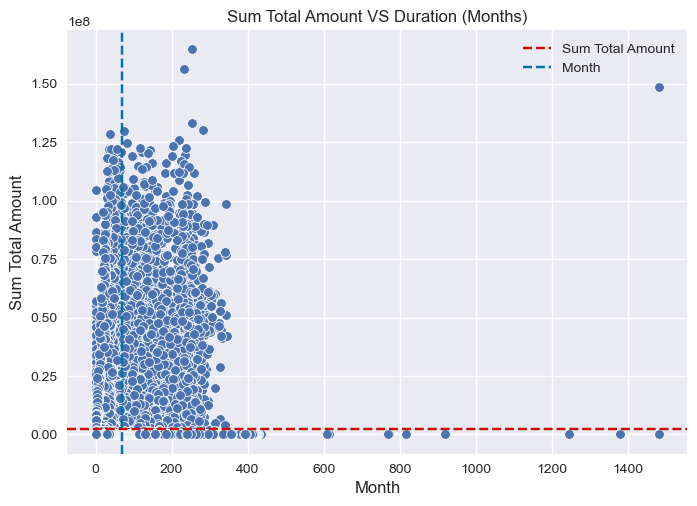

In [59]:
plt.style.use('seaborn-v0_8')

amountvsyr(df)

In [60]:
df = df.reset_index(drop = True)
df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,network_last_6m,total_transaction,transaction_last3m,transaction_last6m,sku_penetrate(%),sku_last3m,sku_last6m,ticket_size,ticket_size_3m,ticket_size_6m
0,TCC43RQQZ3B,0.0,2037000.0,0.0,0.0,1627000.0,0.0,0.0,410000.0,0.0,...,0.0,2.0,0.0,0.0,0.005,0.0,0.000,679000.000,0.0,0.0
1,TCC4Q4JZ4Q0,0.0,795500.0,0.0,0.0,793000.0,0.0,0.0,2500.0,0.0,...,0.0,3.0,0.0,0.0,0.007,0.0,0.000,159100.000,0.0,0.0
2,TCC4RJ11QE7,43.0,31365000.0,0.0,1005000.0,28385000.0,0.0,1005000.0,2980000.0,0.0,...,1.0,23.0,0.0,1.0,0.032,0.0,0.002,497857.143,0.0,335000.0
3,TCC434QRCJY,0.0,341000.0,0.0,0.0,341000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.002,0.0,0.000,341000.000,0.0,0.0
4,TCC43RRCE10,0.0,189000.0,0.0,0.0,189000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.002,0.0,0.000,189000.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796541,H3CCC43B,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0
796542,H3CCC4ZY,157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0
796543,H3CCCEC7,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0
796544,H3CCCE4I,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796546 entries, 0 to 796545
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ent                    796546 non-null  object 
 1   mem_duration(months)   796546 non-null  float64
 2   total_amount           796546 non-null  float64
 3   total_last_3m          796546 non-null  float64
 4   total_last_6m          796546 non-null  float64
 5   total_online           796546 non-null  float64
 6   total_last_3m_online   796546 non-null  float64
 7   total_last_6m_online   796546 non-null  float64
 8   total_offline          796546 non-null  float64
 9   total_last_3m_offline  796546 non-null  float64
 10  total_last_6m_offline  796546 non-null  float64
 11  total_network          796546 non-null  float64
 12  network_last_3m        796546 non-null  float64
 13  network_last_6m        796546 non-null  float64
 14  total_transaction      796546 non-nu

In [62]:
df_c = df.loc[:,['mem_duration(months)','total_amount','total_online','total_offline','total_network','total_transaction','sku_penetrate(%)','ticket_size']]
df_c3 = df.loc[:,['mem_duration(months)','total_last_3m','total_last_3m_online','total_last_3m_offline','network_last_3m','transaction_last3m','sku_last3m','ticket_size_3m']]
df_c6 = df.loc[:,['mem_duration(months)','total_last_6m','total_last_6m_online','total_last_6m_offline','network_last_6m','transaction_last6m','sku_last6m','ticket_size_6m']]


# STEP 2
- Prepare DATA
- Selecting clustering samples.

In [63]:
# pip install scikit-learn-extra

In [64]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer

K-Elbow Method

In [65]:
# model = KMeans(n_init='auto')
# visualizer = KElbowVisualizer(model, k=(2,12))

# visualizer.fit(df)
# visualizer.show()

Silhouette Method

In [66]:
# from sklearn.metrics import silhouette_score

# range_n_clusters = [2, 3, 4, 5, 6]
# for n_clusters in range_n_clusters:
#     clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
#     cluster_labels = clusterer.fit_predict(df)
#     silhouette_avg = silhouette_score(df, cluster_labels)
#     print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)

BI SCORE

In [67]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)

def bicscore(X):
    param_grid = {
        "n_components": range(1, 7),
        "covariance_type": ["spherical", "tied", "diag", "full"] 
        }
    grid_search = GridSearchCV(
        GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score)

    grid_search.fit(X)

    df = pd.DataFrame(grid_search.cv_results_)[
        ["param_n_components", "param_covariance_type", "mean_test_score"]
    ]
    df["mean_test_score"] = -df["mean_test_score"]
    df = df.rename(
        columns={
            "param_n_components": "Number of components",
            "param_covariance_type": "Type of covariance",
            "mean_test_score": "BIC score",
        }
    )
    return df.sort_values(by="BIC score").head()

In [68]:
raise Exception

Exception: 

In [ ]:
bicscore(df_c)

C:\Users\rastu\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
46 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rastu\AppData\Roaming\Python\Python310\site-packages\sklearn\mixture\_gaussian_mixture.py", line 340, in _compute_precision_cholesky
    cov_chol = linalg.cholesky(covariances, lower=True)
  File "c:\ProgramData\anaconda3\lib\site-packages\scipy\linalg\_decomp_cholesky.py", line 89, in cholesky
    c, lower = _cholesky(a, lower=lower, overwrite_a=overwrite_a, clean=True,
  File "c:\ProgramData\anaconda3\lib\site-packages\scipy\linalg\_deco

,Number of components,Type of covariance,BIC score
17,6,diag,1.183771e+07
16,5,diag,1.184865e+07
15,4,diag,1.996592e+07
14,3,diag,2.125975e+07
13,2,diag,2.304666e+07


In [ ]:
bicscore(df_c6)

C:\Users\rastu\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
55 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rastu\AppData\Roaming\Python\Python310\site-packages\sklearn\mixture\_gaussian_mixture.py", line 340, in _compute_precision_cholesky
    cov_chol = linalg.cholesky(covariances, lower=True)
  File "c:\ProgramData\anaconda3\lib\site-packages\scipy\linalg\_decomp_cholesky.py", line 89, in cholesky
    c, lower = _cholesky(a, lower=lower, overwrite_a=overwrite_a, clean=True,
  File "c:\ProgramData\anaconda3\lib\site-packages\scipy\linalg\_deco

,Number of components,Type of covariance,BIC score
17,6,diag,-8.240260e+06
16,5,diag,-8.095098e+06
15,4,diag,-7.649243e+06
14,3,diag,-7.507944e+06
13,2,diag,-7.436664e+06


In [ ]:
bicscore(df_c3)

C:\Users\rastu\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
46 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rastu\AppData\Roaming\Python\Python310\site-packages\sklearn\mixture\_gaussian_mixture.py", line 340, in _compute_precision_cholesky
    cov_chol = linalg.cholesky(covariances, lower=True)
  File "c:\ProgramData\anaconda3\lib\site-packages\scipy\linalg\_decomp_cholesky.py", line 89, in cholesky
    c, lower = _cholesky(a, lower=lower, overwrite_a=overwrite_a, clean=True,
  File "c:\ProgramData\anaconda3\lib\site-packages\scipy\linalg\_deco

,Number of components,Type of covariance,BIC score
17,6,diag,-6.537437e+06
16,5,diag,-6.358566e+06
15,4,diag,-5.994534e+06
14,3,diag,-5.910487e+06
13,2,diag,-5.707451e+06


# RESULTS

- Gaussian Mixture

> Gaussian mixture models are also relatively robust to outliers, meaning that they can still yield accurate results even if there are some data points that do not fit neatly into any of the clusters.
>
> source : https://vitalflux.com/gaussian-mixture-models-what-are-they-when-to-use/

In [69]:
cl = GaussianMixture(n_components=6, covariance_type='diag', random_state=42)
df['cluster1'] = cl.fit(df_c).predict(df_c)

cl6m = GaussianMixture(n_components=6, covariance_type='diag', random_state=42)
df['cluster2'] = cl6m.fit(df_c6).predict(df_c6)

cl3m = GaussianMixture(n_components=6, covariance_type='diag', random_state=42)
df['cluster3'] = cl3m.fit(df_c3).predict(df_c3)

df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,transaction_last6m,sku_penetrate(%),sku_last3m,sku_last6m,ticket_size,ticket_size_3m,ticket_size_6m,cluster1,cluster2,cluster3
0,TCC43RQQZ3B,0.0,2037000.0,0.0,0.0,1627000.0,0.0,0.0,410000.0,0.0,...,0.0,0.005,0.0,0.000,679000.000,0.0,0.0,0,0,0
1,TCC4Q4JZ4Q0,0.0,795500.0,0.0,0.0,793000.0,0.0,0.0,2500.0,0.0,...,0.0,0.007,0.0,0.000,159100.000,0.0,0.0,0,0,0
2,TCC4RJ11QE7,43.0,31365000.0,0.0,1005000.0,28385000.0,0.0,1005000.0,2980000.0,0.0,...,1.0,0.032,0.0,0.002,497857.143,0.0,335000.0,1,4,0
3,TCC434QRCJY,0.0,341000.0,0.0,0.0,341000.0,0.0,0.0,0.0,0.0,...,0.0,0.002,0.0,0.000,341000.000,0.0,0.0,0,0,0
4,TCC43RRCE10,0.0,189000.0,0.0,0.0,189000.0,0.0,0.0,0.0,0.0,...,0.0,0.002,0.0,0.000,189000.000,0.0,0.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796541,H3CCC43B,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.000,0.0,0.0,5,0,0
796542,H3CCC4ZY,157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.000,0.0,0.0,5,0,0
796543,H3CCCEC7,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.000,0.0,0.0,5,0,0
796544,H3CCCE4I,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000,0.0,0.000,0.000,0.0,0.0,5,0,0


In [ ]:
# df.to_csv('D:\DATA_Science\GitHub\BeforeGIT\week05_segment_result.csv')

# for MacOS
# df.to_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/week05_segment_result.csv')

PLOT (Gaussian Mixture Model)

In [70]:
# Prepare data for a Visualization

dfk = df.drop(columns=['ent','cluster1','cluster2','cluster3'])

bfc = Pipeline(
    steps=[("normalization", MinMaxScaler()),
           ('PCA',PCA(n_components=2, random_state=42))
           ])

dfk = bfc.fit_transform(dfk)

dfk = pd.DataFrame(dfk)

display(dfk)

,0,1
0,-0.058642,-0.032489
1,-0.027275,-0.035690
2,-0.071129,0.200082
3,-0.035265,-0.046353
4,-0.025897,-0.047908
...,...,...
796541,0.086264,-0.032654
796542,0.086901,-0.032517
796543,0.086263,-0.032637
796544,0.086264,-0.032654


In [71]:
# Getting unique labels
def plotClus(df,col):
    dfk['cluster'] = df[col]
    
    # plotting the results:
    
    plt.style.use('seaborn-v0_8')

    fig, axe = plt.subplots(figsize=(6,4), dpi = 96)

    color_dict = dict({0:'#D2B48C', 1:'#B0E0E6',
                    2: '#7B68EE',3: '#1E90FF',4: '#9FE2BF',5: '#FFDEAD'})

    g = sns.scatterplot(data = dfk , x=0, y=1, hue="cluster", ax=axe ,alpha=1, palette=color_dict)
    axe.set(xlabel='PCA X', ylabel='PCA Y')
    fig.suptitle("Gaussian Mixture Model Clustering results")
    plt.show()

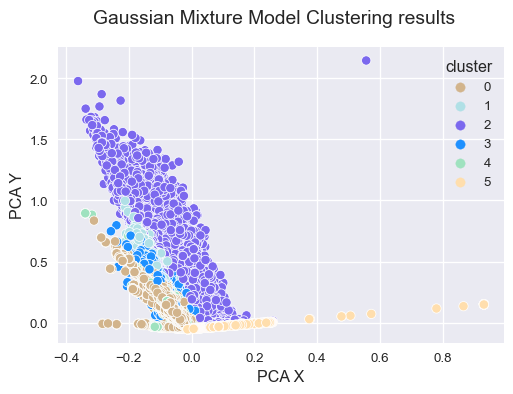

In [72]:
plotClus(df,'cluster1')

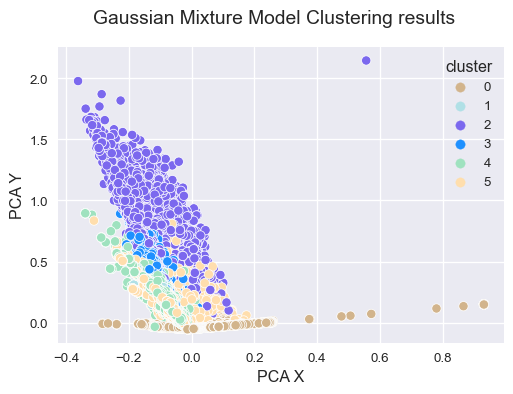

In [73]:
plotClus(df,'cluster2') #6m

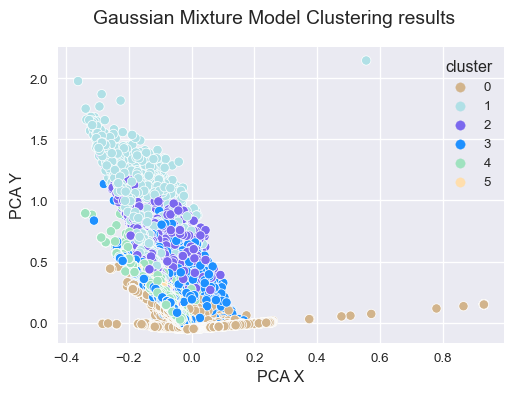

In [74]:
plotClus(df,'cluster3') #3m

- Feature Importance

In [75]:
# decision tree for feature importance on a regression problem
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def featurim(df,clus,col):
    # define dataset
    X = df.drop(columns=['ent','cluster1','cluster2','cluster3'])
    # y = df['cluster']

    y = pd.get_dummies(df[col])

    X_train, X_test, y_train, y_test = train_test_split(X, y[clus], test_size=0.33, random_state=42)
    
    classifier = DecisionTreeClassifier( criterion = 'gini')
    classifier.fit(X_train, y_train)

    feat_importances = pd.DataFrame(classifier.feature_importances_, index=X.columns, columns=["Importance"]
                                    ).sort_values(by=['Importance'], ascending=False)

    return feat_importances

In [77]:
# The 6th feature importance of each cluster

print( F"\
        Cluster 0 : \n\n{featurim(df, clus = 0, col = 'cluster1')[:8]}\n\n\
        Cluster 1 : \n\n{featurim(df, clus = 1, col = 'cluster1')[:8]}\n\n\
        Cluster 2 : \n\n{featurim(df, clus = 2, col = 'cluster1')[:8]}\n\n\
        Cluster 3 : \n\n{featurim(df, clus = 3, col = 'cluster1')[:8]}\n\n\
        Cluster 4 : \n\n{featurim(df, clus = 4, col = 'cluster1')[:8]}\n\n\
        Cluster 5 : \n\n{featurim(df, clus = 5, col = 'cluster1')[:8]}\n"
        )

        Cluster 0 : 

                      Importance
total_amount            0.763829
total_network           0.188191
total_transaction       0.030546
sku_penetrate(%)        0.007186
total_online            0.003091
mem_duration(months)    0.002980
ticket_size             0.002519
total_offline           0.001304

        Cluster 1 : 

                      Importance
total_amount            0.732700
total_network           0.084479
total_transaction       0.057759
sku_penetrate(%)        0.044868
mem_duration(months)    0.041099
total_offline           0.013480
total_online            0.010308
ticket_size             0.008179

        Cluster 2 : 

                      Importance
total_amount            0.680194
mem_duration(months)    0.100826
total_network           0.095877
total_transaction       0.036252
ticket_size             0.032140
total_offline           0.019985
sku_penetrate(%)        0.018411
total_online            0.007066

        Cluster 3 : 

                  

In [78]:
print( F"\
        Cluster 0 : \n\n{featurim(df, clus = 0, col = 'cluster2')[:8]}\n\n\
        Cluster 1 : \n\n{featurim(df, clus = 1, col = 'cluster2')[:8]}\n\n\
        Cluster 2 : \n\n{featurim(df, clus = 2, col = 'cluster2')[:8]}\n\n\
        Cluster 3 : \n\n{featurim(df, clus = 3, col = 'cluster2')[:8]}\n\n\
        Cluster 4 : \n\n{featurim(df, clus = 4, col = 'cluster2')[:8]}\n\n\
        Cluster 5 : \n\n{featurim(df, clus = 5, col = 'cluster2')[:8]}\n"
        )

        Cluster 0 : 

                      Importance
sku_last6m              0.903329
network_last_6m         0.096671
mem_duration(months)    0.000000
total_amount            0.000000
ticket_size_3m          0.000000
ticket_size             0.000000
sku_last3m              0.000000
sku_penetrate(%)        0.000000

        Cluster 1 : 

                       Importance
total_last_6m_online     0.384700
transaction_last6m       0.247752
total_last_6m_offline    0.170123
total_last_6m            0.111354
network_last_6m          0.036069
mem_duration(months)     0.018410
sku_last6m               0.013005
sku_penetrate(%)         0.003249

        Cluster 2 : 

                       Importance
total_last_6m            0.676909
mem_duration(months)     0.095909
transaction_last6m       0.072583
network_last_6m          0.066022
total_last_6m_online     0.027179
sku_last6m               0.015195
total_last_6m_offline    0.009117
total_network            0.004802

        Cluster 3 : 



In [79]:
print( F"\
        Cluster 0 : \n\n{featurim(df, clus = 0, col = 'cluster3')[:8]}\n\n\
        Cluster 1 : \n\n{featurim(df, clus = 1, col = 'cluster3')[:8]}\n\n\
        Cluster 2 : \n\n{featurim(df, clus = 2, col = 'cluster3')[:8]}\n\n\
        Cluster 3 : \n\n{featurim(df, clus = 3, col = 'cluster3')[:8]}\n\n\
        Cluster 4 : \n\n{featurim(df, clus = 4, col = 'cluster3')[:8]}\n\n\
        Cluster 5 : \n\n{featurim(df, clus = 5, col = 'cluster3')[:8]}\n"
        )

        Cluster 0 : 

                    Importance
transaction_last3m    0.859624
network_last_3m       0.140376
total_amount          0.000000
ticket_size_3m        0.000000
ticket_size           0.000000
sku_last6m            0.000000
sku_last3m            0.000000
sku_penetrate(%)      0.000000

        Cluster 1 : 

                       Importance
total_last_3m            0.540826
transaction_last3m       0.215423
network_last_3m          0.080192
sku_last3m               0.032446
ticket_size_3m           0.030042
total_last_3m_online     0.023060
total_last_3m_offline    0.013785
mem_duration(months)     0.010413

        Cluster 2 : 

                       Importance
total_last_3m            0.432083
total_last_3m_offline    0.120221
total_last_3m_online     0.119519
transaction_last3m       0.080748
network_last_3m          0.065505
mem_duration(months)     0.044702
sku_last3m               0.027027
sku_penetrate(%)         0.023307

        Cluster 3 : 

                  

# Segmentation movement

In [80]:
# prepare data

dfoff = df.loc[:,['ent','cluster1','cluster2','cluster3']]

dfoff

,ent,cluster1,cluster2,cluster3
0,TCC43RQQZ3B,0,0,0
1,TCC4Q4JZ4Q0,0,0,0
2,TCC4RJ11QE7,1,4,0
3,TCC434QRCJY,0,0,0
4,TCC43RRCE10,0,0,0
...,...,...,...,...
796541,H3CCC43B,5,0,0
796542,H3CCC4ZY,5,0,0
796543,H3CCCEC7,5,0,0
796544,H3CCCE4I,5,0,0


In [81]:
sankey_source = []
sankey_target = []
for i  in range(6):
    for j in range(6):
        sankey_source.append(i)
        sankey_target.append(j+6)

for i  in range(6):
    for j in range(6):
        sankey_source.append(i+6)
        sankey_target.append(j+12)

# sankey values

c = 0
vals = []
for c,n,i in zip(range(len(sankey_source)),sankey_source,sankey_target):
    if c < 36 :
        d = dfoff.loc[(dfoff['cluster1'] == n) & (dfoff['cluster2'] == i-6)]
        vals.append(len(d))
    else :
        d = dfoff.loc[(dfoff['cluster2'] == n-6) & (dfoff['cluster3'] == i-12)]
        vals.append(len(d))

In [172]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 10,
      thickness = 20,
      line = dict(color = "black", width = 0.1),
      label = ["Segment1-C0", "Segment1-C1", "Segment1-C2", "Segment1-C3", "Segment1-C4", "Segment1-C5",
               "Segment2-C0", "Segment2-C1", "Segment2-C2", "Segment2-C3", "Segment2-C4", "Segment2-C5",
               "Segment3-C0", "Segment3-C1", "Segment3-C2", "Segment3-C3", "Segment3-C4", "Segment3-C5",
               ],
      color = [
               "rgb(72,61,139)","rgb(72,61,139)","rgb(72,61,139)","rgb(72,61,139)","rgb(72,61,139)","rgb(72,61,139)",
               "rgb(65,105,225)","rgb(65,105,225)","rgb(65,105,225)","rgb(65,105,225)","rgb(65,105,225)","rgb(65,105,225)",
               "rgb(123,104,238)","rgb(123,104,238)","rgb(123,104,238)","rgb(123,104,238)","rgb(123,104,238)","rgb(123,104,238)",
               ]
    ),
    link = dict(
      source = sankey_source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = sankey_target,
      value = vals,
      color = [
              "rgba(100,149,237,0.6)","rgba(100,149,237,0.6)","rgba(100,149,237,0.6)","rgba(100,149,237,0.6)","rgba(100,149,237,0.6)","rgba(100,149,237,0.6)",  #c1-1
              "rgba(102,205,170,0.6)","rgba(102,205,170,0.6)","rgba(102,205,170,0.6)","rgba(102,205,170,0.6)","rgba(102,205,170,0.6)","rgba(102,205,170,0.6)",  #c2-1
              "rgba(175,238,238,0.6)","rgba(175,238,238,0.6)","rgba(175,238,238,0.6)","rgba(175,238,238,0.6)","rgba(175,238,238,0.6)","rgba(175,238,238,0.6)",  #c3-1

              "rgba(100,149,237,0.6)","rgba(100,149,237,0.6)","rgba(100,149,237,0.6)","rgba(100,149,237,0.6)","rgba(100,149,237,0.6)","rgba(100,149,237,0.6)",  #c4-1
              "rgba(192,192,192,0.6)","rgba(192,192,192,0.6)","rgba(192,192,192,0.6)","rgba(192,192,192,0.6)","rgba(192,192,192,0.6)","rgba(192,192,192,0.6)",  #c5-1
              "rgba(30,144,255,0.6)","rgba(30,144,255,0.6)","rgba(30,144,255,0.6)","rgba(30,144,255,0.6)","rgba(30,144,255,0.6)","rgba(30,144,255,0.6)",        #c6-1

              "rgba(173,216,230,0.6)","rgba(173,216,230,0.6)","rgba(173,216,230,0.6)","rgba(173,216,230,0.6)","rgba(173,216,230,0.6)","rgba(173,216,230,0.6)",  #c1-2
              "rgba(102,205,170,0.6)","rgba(102,205,170,0.6)","rgba(102,205,170,0.6)","rgba(102,205,170,0.6)","rgba(102,205,170,0.6)","rgba(102,205,170,0.6)",  #c2-2
              "rgba(192,192,192,0.6)","rgba(192,192,192,0.6)","rgba(192,192,192,0.6)","rgba(192,192,192,0.6)","rgba(192,192,192,0.6)","rgba(192,192,192,0.6)",  #c3-2

              "rgba(60,179,113,0.6)","rgba(60,179,113,0.6)","rgba(60,179,113,0.6)","rgba(60,179,113,0.6)","rgba(60,179,113,0.6)","rgba(60,179,113,0.6)",        #c4-2
              "rgba(100,149,237,0.6)","rgba(100,149,237,0.6)","rgba(100,149,237,0.6)","rgba(100,149,237,0.6)","rgba(100,149,237,0.6)","rgba(100,149,237,0.6)",  #c5-2
              "rgba(30,144,255,0.6)","rgba(30,144,255,0.6)","rgba(30,144,255,0.6)","rgba(30,144,255,0.6)","rgba(30,144,255,0.6)","rgba(30,144,255,0.6)",        #c6-2
               ]
  ))])

fig.update_layout(title_text="Sankey Diagram by Cluster", font_size=10)
fig.show()